<center> <h1> A Pizza the Profit </h1> </center>
<center> <h2> Marketing and Customer Analysis for a local Pizza franchise </center> </h2> 
<center> <img src="./Images/ivan-torres-MQUqbmszGGM-unsplash.jpg" alt="Pizza" width="800"/> </center>
<center> Photo by <a href="https://unsplash.com/@iavnt?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Ivan Torres</a> on <a href="https://unsplash.com/s/photos/pizza?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a></center>




#### Stakeholder & Business Problem: A local pizza franchise looking to bring in new customers and encourage existing customers to continue returning. It is my goal to identify if a specific discount code or dollar value is the most likely to increase sales and by what amount.

#### The null hypothesis is that the independent variables (in our case, the discount codes and values) together do not explain any variability in the dependent variable (net sales). 
#### The alternate hypothesis is that the discount codes can explain variability in net sales.
#### 45 independent variables, including a constant.

### Modeling

Since I am working to predict the most effective discount codes and value for increasing sales and by how much, this is going to be a regression problem. The first thing to do is to call up my cleaned DataFrames from my EDA notebook. I'll run a simple Linear Regression against the Net Sales. The initial model, as expected, performs poorly. I run a SelectKBest to identify the best features in terms of both correlation and information gain. Once those features are identified, I rerun my baseline model to check performance. From there, iterations are continued and described throughout the notebook. Please see "Model Iterations" below.

In [1]:
#importing needed libraries, as well as additional libraries with potential for utilization
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.model_selection import train_test_split, cross_validate
import statsmodels.api as sm
from statsmodels.api import OLS

In [2]:
#call in all of my pickles 
discounted_orders = pd.read_pickle('./Pickles/disc_orders_ohe')
total_sales = pd.read_pickle('./Pickles/total_sales')
total_marketing = pd.read_pickle('./Pickles/total_marketing')
marketing_condensed = pd.read_pickle('./Pickles/total_marketing_condensed')

In [3]:
discounted_orders.describe()

,Net Sales,Total Discount Amount,Discount Code_$4 Off Any Pizza,Discount Code_100% Off,Discount Code_35% Off 3 Large Pizzas,Discount Code_7-7-7 Deal,Discount Code_Bogo,Discount Code_COLRG1,Discount Code_COLRG2,Discount Code_Coupon,...,Discount Code_GET25SCRATCH,Discount Code_Hotel Front Desk,Discount Code_LARGEFAV,Discount Code_MAIL25,Discount Code_Movers Free Medium,Discount Code_Reading Program Free Personal,Discount Code_SALAD1,Discount Code_SAVE20,Discount Code_WINGS1,Discount Code_others
count,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,...,5204.000000,5204.00000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000
mean,25.146061,8.923013,0.013259,0.009224,0.003651,0.018255,0.001345,0.012490,0.000384,0.001922,...,0.001153,0.00442,0.002306,0.384320,0.012683,0.015565,0.001345,0.082244,0.009224,0.039201
std,14.640155,5.688206,0.114393,0.095605,0.060319,0.133886,0.036655,0.111071,0.019602,0.043798,...,0.033939,0.06634,0.047969,0.486481,0.111911,0.123797,0.036655,0.274763,0.095605,0.194091
min,0.000000,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.480000,5.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.475000,7.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.960000,11.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,206.110000,68.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
discounted_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5204 entries, 580979 to 1417832
Data columns (total 46 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Net Sales                                    5204 non-null   float64
 1   Total Discount Amount                        5204 non-null   float64
 2   Items Ordered                                5204 non-null   object 
 3   Discount Code_$4 Off Any Pizza               5204 non-null   uint8  
 4   Discount Code_100% Off                       5204 non-null   uint8  
 5   Discount Code_35% Off 3 Large Pizzas         5204 non-null   uint8  
 6   Discount Code_7-7-7 Deal                     5204 non-null   uint8  
 7   Discount Code_Bogo                           5204 non-null   uint8  
 8   Discount Code_COLRG1                         5204 non-null   uint8  
 9   Discount Code_COLRG2                         5204 non-null   uint8

In [5]:
#train test split and add constant to X for modeling - Dropping Items Ordered for initial model - will assess 
#predictive value of specific items separately if time allows

X = discounted_orders.drop(columns=['Net Sales', 'Items Ordered'])
y = discounted_orders['Net Sales']
X = sm.add_constant(X)

X_train_val, X_val, y_train_val, y_val = train_test_split(X, y, test_size=0.25, random_state=123)

In [6]:
#Secondary split to set X_test and y_test aside to the very end as final holdout for best model.

X_train, X_test, y_train, y_test = train_test_split(X_val, y_val, test_size=0.10, random_state=123)

In [7]:
prelim_model = LinearRegression()
prelim_cv = cross_validate(prelim_model, X_train_val, y_train_val, cv=5,
                           scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)

In [8]:
prelim_cv

{'fit_time': array([0.10234404, 0.05439806, 0.02820206, 0.00903821, 0.00818682]),
 'score_time': array([0.01187897, 0.00671601, 0.00522995, 0.00412011, 0.00353718]),
 'test_r2': array([0.47671485, 0.38862995, 0.50894628, 0.44728633, 0.35364606]),
 'train_r2': array([0.45572449, 0.4767493 , 0.44303006, 0.46027777, 0.47749157]),
 'test_neg_mean_squared_error': array([-109.58854068, -143.87517198, -123.12961472, -134.53973183,
        -113.41993629]),
 'train_neg_mean_squared_error': array([-123.30055245, -115.15937828, -120.43138765, -117.57376073,
        -122.74036936])}

In [9]:
#Apply StandardScaler to see if performance improves
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train_val)
X_val_scaled = ss.transform(X_val)

In [10]:
#performance really doesn't change much on the first two scores goes crazy on middle two
# magnitude in terms of scale is not far off so scale should not really matter here. Proceeding with unscaled
scaled_model = LinearRegression()
scaled_cv = cross_validate(prelim_model, X_train_scaled, y_train_val, cv=5,
                           scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)
scaled_cv

{'fit_time': array([0.02930808, 0.02440786, 0.02774763, 0.04000998, 0.04536319]),
 'score_time': array([0.00154495, 0.00286603, 0.00160623, 0.00160813, 0.00326681]),
 'test_r2': array([ 4.76373145e-01,  3.88555951e-01, -5.70582510e+23, -1.91930021e+28,
         3.52499407e-01]),
 'train_r2': array([0.45569946, 0.47543145, 0.44302111, 0.45756863, 0.47737042]),
 'test_neg_mean_squared_error': array([-1.09660102e+02, -1.43892587e+02, -1.43071118e+26, -4.67189702e+30,
        -1.13621147e+02]),
 'train_neg_mean_squared_error': array([-123.30622178, -115.44941604, -120.43332313, -118.16392428,
        -122.76882902])}

In [11]:
#running the OLS for the clean summary printout
ols1 = OLS(y_train_val, X_train_val)
results = ols1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Net Sales   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     78.57
Date:                Wed, 02 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:27:03   Log-Likelihood:                -14886.
No. Observations:                3903   AIC:                         2.986e+04
Df Residuals:                    3860   BIC:                         3.013e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.0353      0.821     -0.043      0.966      -1.644       1.574
Total Discount Amount                           1.4995      0.036     41.124      0.000       1.428       1.571
Discount Code_$4 Off Any Pizza                 15.6516      1.706      9.173      0.000      12.306      18.997
Discount Code_100% Off                        -19.5218      1.938    -10.073      0.000     -23.321     -15.722
Discount Code_35% Off 3 Large Pizzas            2.7608      2.983      0.926      0.355      -3.087       8.608
Discount Code_7-7-7 Deal                        2.3931      1.468      1.630      0.103      -0.485       5.271
Discount Code_Bogo                            -11.4425      4.137     -2.766      0.006     -19.552      -3.332
Discount Code_COLRG1                            4.5931      1.666      2.757      0.006       1.326       7.860
Discount Code_COLRG2                            1.3251      7.647      0.173      0.862     -13.667      16.317
Discount Code_Coupon                           -2.9126      4.450     -0.655      0.513     -11.636       5.811
Discount Code_DMDIN3                           15.1076      1.788      8.451      0.000      11.603      18.613
Discount Code_DMFAV1                           12.5911      3.478      3.620      0.000       5.771      19.411
Discount Code_DMMED2                           -1.6301      1.779     -0.916      0.360      -5.119       1.859
Discount Code_DMMED3                           10.6704      2.777      3.843      0.000       5.226      16.115
Discount Code_DMPAIR1                          16.5325      1.528     10.819      0.000      13.537      19.528
Discount Code_Employee Discount                -5.8672      3.868     -1.517      0.129     -13.450       1.716
Discount Code_FREE MED 1 TOP                    1.8517      2.502      0.740      0.459      -3.054       6.758
Discount Code_FREEMDM                           9.9615      3.317      3.003      0.003       3.457      16.466
Discount Code_Food Drive Deal                 -10.7184      6.255     -1.713      0.087     -22.983       1.546
Discount Code_Free Birthday Pizza             -16.9447      3.318     -5.107      0.000     -23.450     -10.439
Discount Code_Free Large Pizza Card           -23.9488      2.594     -9.233      0.000     -29.034     -18.863
Discount Code_Free Large pizza coupon          -7.4575     10.797     -0.691      0.490     -28.627      13.712
Discount Code_Free birthday pizza             -26.9402     10.793     -2.496      0.013     -48.100      -5.780
Discount Code_Free large pizza coupon         -35.1296      5.450     -6.446      0.000     -45.814     -24.445
Discount Code_Free pizza coupon               -26.7528     

In [12]:
#Possible we have too many features here? Let's use SKLearn to SelectKBest based on correlation
#This blog was especially helpful https://machinelearningmastery.com/feature-selection-for-regression-data/
from sklearn.feature_selection import SelectKBest, f_regression
#using regression function and k set to all so it analyzes all features
feature_select = SelectKBest(score_func=f_regression, k='all')
#fit on training data
feature_select.fit(X_train_val, y_train_val)

#transform training and validation predictors
X_train_fs = feature_select.transform(X_train_val)
X_val_fs = feature_select.transform(X_val)
X_val_fs, X_train_fs, feature_select

/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


(array([[ 1.  ,  6.14,  0.  , ...,  1.  ,  0.  ,  0.  ],
        [ 1.  ,  9.68,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 1.  , 18.75,  0.  , ...,  0.  ,  0.  ,  0.  ],
        ...,
        [ 1.  ,  4.49,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 1.  ,  6.43,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 1.  , 10.99,  0.  , ...,  0.  ,  0.  ,  0.  ]]),
 array([[ 1.  , 52.92,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 1.  ,  7.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 1.  , 11.37,  0.  , ...,  0.  ,  0.  ,  0.  ],
        ...,
        [ 1.  ,  2.62,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 1.  ,  6.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 1.  , 12.24,  0.  , ...,  0.  ,  0.  ,  0.  ]]),
 SelectKBest(k='all', score_func=<function f_regression at 0x7fe418626e50>))

In [13]:
#print scores and their features
#Need to find a way to get the names out - I believe the numbers are the column numbers. Confirmed below
for i in range(len(feature_select.scores_)):
    print('Feature %d: %f' % (i, feature_select.scores_[i]))

Feature 0: nan
Feature 1: 472.651683
Feature 2: 1.419601
Feature 3: 36.252408
Feature 4: 9.483825
Feature 5: 0.099925
Feature 6: 1.196158
Feature 7: 23.514088
Feature 8: 0.984540
Feature 9: 0.904955
Feature 10: 0.136027
Feature 11: 0.167333
Feature 12: 4.027165
Feature 13: 1.942257
Feature 14: 18.949954
Feature 15: 6.452765
Feature 16: 3.153340
Feature 17: 0.568012
Feature 18: 2.467380
Feature 19: 20.771591
Feature 20: 16.332842
Feature 21: 0.013189
Feature 22: 2.861883
Feature 23: 8.134446
Feature 24: 5.729439
Feature 25: 5.070573
Feature 26: 2.612408
Feature 27: nan
Feature 28: 435.332662
Feature 29: 33.982795
Feature 30: 9.607506
Feature 31: 0.193304
Feature 32: 10.644670
Feature 33: 0.046044
Feature 34: 14.231754
Feature 35: 2.426065
Feature 36: 2.908640
Feature 37: 0.861272
Feature 38: 159.821606
Feature 39: 42.709737
Feature 40: 42.465822
Feature 41: 0.030399
Feature 42: 73.773491
Feature 43: 0.399230
Feature 44: 24.124641


In [14]:
#Feature Importance - reformatted random forest feature extraction code I used in Phase 3
#adding to function!
feat_import = {name: score 
                   for name, score 
                       in zip(X_train_val.columns, feature_select.scores_)
}
feat_import = pd.DataFrame.from_dict(feat_import, orient='index')
feat_import

,0
const,NaN
Total Discount Amount,472.651683
Discount Code_$4 Off Any Pizza,1.419601
Discount Code_100% Off,36.252408
Discount Code_35% Off 3 Large Pizzas,9.483825
Discount Code_7-7-7 Deal,0.099925
Discount Code_Bogo,1.196158
Discount Code_COLRG1,23.514088
Discount Code_COLRG2,0.984540
Discount Code_Coupon,0.904955


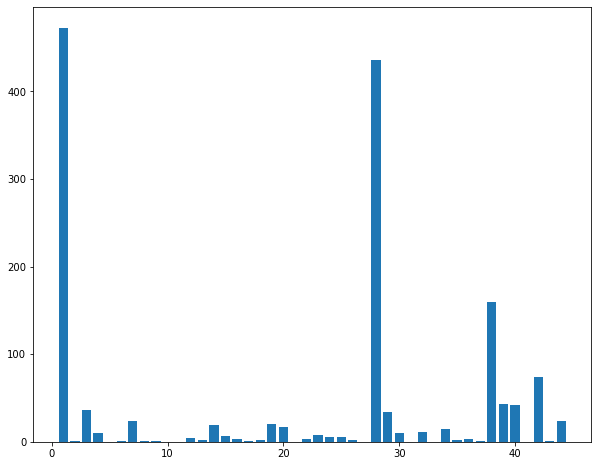

In [15]:
#Plot scores on a bar graph for visual aid - definitely see some have more significance than others
plt.figure(figsize=(10,8))
plt.bar([i for i in range(len(feature_select.scores_))], feature_select.scores_)
plt.show()

In [16]:
#Function to perform this operation, adapted from tutorial linked above
def select_features(scorer, k_val, X_train, y_train, X_test):
    """
    scorer = which feature selection function from SKLearn to use 
    k = number of features to select, can be string for all or int
    provide X_train, X_test, and y_train for fit and transform
    """
    feat_select = SelectKBest(score_func=scorer, k=k_val)
    # learn relationship from training data
    feat_select.fit(X_train, y_train)
    # transform train input data
    X_train_fs = feat_select.transform(X_train)
    # transform test input data
    X_test_fs = feat_select.transform(X_test)
    feature_import = {name: score for name, score in zip(X_train.columns, feat_select.scores_)}
    feature_import = pd.DataFrame.from_dict(feature_import, orient='index')
    plt.figure(figsize=(10,8))
    plt.bar([i for i in range(len(feat_select.scores_))], feat_select.scores_)
    return print(feature_import)

                                                    0
const                                        0.000000
Total Discount Amount                        2.212190
Discount Code_$4 Off Any Pizza               0.009354
Discount Code_100% Off                       0.006492
Discount Code_35% Off 3 Large Pizzas         0.001077
Discount Code_7-7-7 Deal                     0.038251
Discount Code_Bogo                           0.000000
Discount Code_COLRG1                         0.030929
Discount Code_COLRG2                         0.005131
Discount Code_Coupon                         0.008869
Discount Code_DMDIN3                         0.004190
Discount Code_DMFAV1                         0.006900
Discount Code_DMMED2                         0.028069
Discount Code_DMMED3                         0.002313
Discount Code_DMPAIR1                        0.027517
Discount Code_Employee Discount              0.000000
Discount Code_FREE MED 1 TOP                 0.000000
Discount Code_FREEMDM       

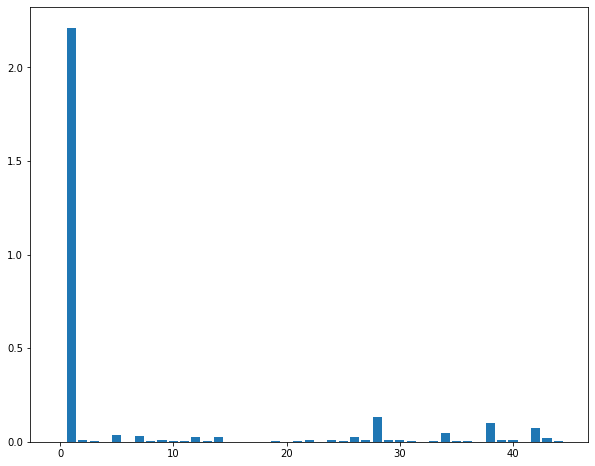

In [17]:
#How does this change based on info gain? Trying this again but with a different scorer based on information.
from sklearn.feature_selection import mutual_info_regression
select_features(mutual_info_regression, 'all', X_train_val, y_train_val, X_val)

In [18]:
#setting up to test run a model with only 10 best features to see how performance changes
ten_feature_select = SelectKBest(score_func=f_regression, k=10)
ten_feature_select.fit(X_train_val, y_train_val)
X_train_fst = ten_feature_select.transform(X_train_val)
X_val_fst = ten_feature_select.transform(X_val)
ten_feature_import = {name: score for name, score in zip(X_train_val.columns, ten_feature_select.scores_)}
ten_feature_import = pd.DataFrame.from_dict(ten_feature_import, orient='index')
ten_feature_import = ten_feature_import.sort_values(by=0, ascending=False).head(10)
ten_feature_import

/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,0
Total Discount Amount,472.651683
Discount Code_GET25EMPLOYEE,435.332662
Discount Code_MAIL25,159.821606
Discount Code_SAVE20,73.773491
Discount Code_Movers Free Medium,42.709737
Discount Code_Reading Program Free Personal,42.465822
Discount Code_100% Off,36.252408
Discount Code_GET25FREE,33.982795
Discount Code_others,24.124641
Discount Code_COLRG1,23.514088


In [19]:
#sanity check to make sure the correct features were grabbed in my code above
ten_feature_select.get_support(indices=True)

array([ 1,  3,  7, 28, 29, 38, 39, 40, 42, 44])

In [20]:
X_train[X_train.columns[42]]

Order Num
1183284    0
682482     0
1427667    0
723290     0
367469     0
          ..
627858     0
506963     0
1033214    0
573788     0
1136440    0
Name: Discount Code_SAVE20, Length: 1170, dtype: uint8

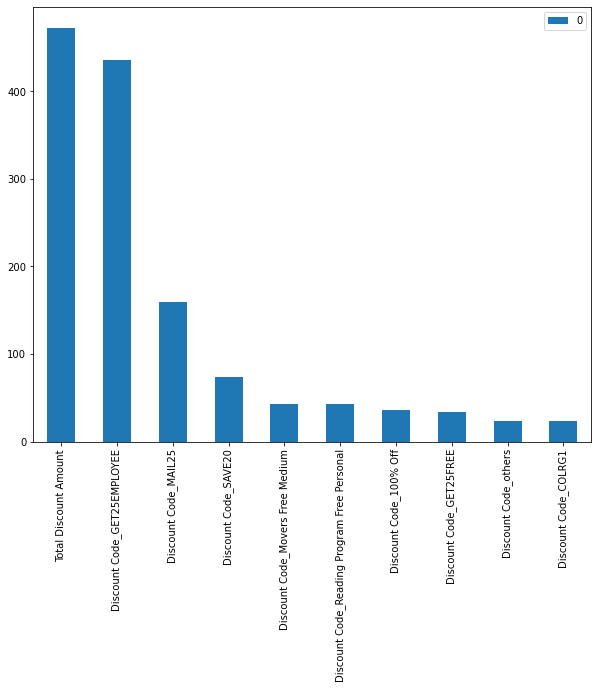

In [21]:
ten_feature_import.plot(kind='bar', figsize=(10,8));

In [22]:
ols_10_feat = OLS(y_train_val, X_train_fst)
results2 = ols_10_feat.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Net Sales   R-squared (uncentered):                   0.785
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              1425.
Date:                Wed, 02 Mar 2022   Prob (F-statistic):                        0.00
Time:                        12:27:16   Log-Likelihood:                         -15724.
No. Observations:                3903   AIC:                                  3.147e+04
Df Residuals:                    3893   BIC:                                  3.153e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0274      0.028     71.336      0.000       1.972       2.083
x2           -30.1065      2.339    -12.873      0.000     -34.692     -25.521
x3             0.8057      1.917      0.420      0.674      -2.952       4.564
x4            -9.1857      0.883    -10.397      0.000     -10.918      -7.454
x5           -32.4671      2.320    -13.996      0.000     -37.015     -27.919
x6            11.7378      0.428     27.426      0.000      10.899      12.577
x7           -17.0406      2.005     -8.500      0.000     -20.971     -13.110
x8            -1.1324      1.740     -0.651      0.515      -4.544       2.279
x9            18.4402      0.776     23.751      0.000      16.918      19.962
x10           -6.3528      1.172     -5.420      0.000      -8.651      -4.055
==============================================================================
Omnibus:                      543.405   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7313.468
Skew:                          -0.090   Prob(JB):                         0.00
Kurtosis:                       9.704   Cond. No.                         119.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#evaulating on the validation data - severely overfitting on the training data. High variance indicative. 
ols_10_preds = results2.predict(X_val_fst)
ols_10_mse = mean_squared_error(y_val, ols_10_preds)
ols_10_mae = mean_absolute_error(y_val, ols_10_preds)
ols_exp_var = explained_variance_score(y_val, ols_10_preds)
ols_r2_score = r2_score(y_val, ols_10_preds)
print(f'MSE:',ols_10_mse, 'MAE:',ols_10_mae, 'R2:',ols_r2_score, 'Exp Variance:',ols_exp_var)

MSE: 152.14192967819423 MAE: 8.753534478870337 R2: 0.18899568767925556 Exp Variance: 0.223233767672813


In [24]:
#Attempting cross validation with regularization on the top ten identified features to check performance
top_10_lcv = LassoCV(cv=10)

In [25]:
top_10_lcv.fit(X_train_fst, y_train_val)
top_10_lcv.score(X_train_fst, y_train_val)

0.3578925779121699

In [26]:
#Lasso Regularization does provide some performance increase.
lasso_preds = top_10_lcv.predict(X_val_fst)
top_10_lcv_mse = mean_squared_error(y_val, lasso_preds)
top_10_lcv_mae = mean_absolute_error(y_val, lasso_preds)
top_10_lcv_var = explained_variance_score(y_val, lasso_preds)
top_10_lcv_score = r2_score(y_val, lasso_preds)
print(f'MSE:',top_10_lcv_mse, 'MAE:',top_10_lcv_mae, 'R2:',top_10_lcv_score, 'Exp Variance:',top_10_lcv_var)

MSE: 114.94378057497077 MAE: 7.622781585464671 R2: 0.38728329581512155 Exp Variance: 0.3877372061084664


In [27]:
#how does RidgeCV perform? - Better than Lasso - proceeding with Ridge Reg over Lasso.
top_10_rcv = RidgeCV(scoring= 'neg_mean_squared_error', cv=10)
top_10_rcv.fit(X_train_fst, y_train_val)
top_10_rcv.score(X_train_fst, y_train_val)

0.3599125454994391

In [28]:
ridge_preds = top_10_rcv.predict(X_val_fst)
top_10_rcv_mse = mean_squared_error(y_val, ridge_preds)
top_10_rcv_mae = mean_absolute_error(y_val, ridge_preds)
top_10_rcv_var = explained_variance_score(y_val, ridge_preds)
top_10_rcv_score = r2_score(y_val, ridge_preds)
print(f'MSE:',top_10_rcv_mse, 'MAE:',top_10_rcv_mae, 'R2:',top_10_rcv_score, 'Exp Variance:',top_10_rcv_var)

MSE: 114.16455179616365 MAE: 7.600983775552808 R2: 0.3914370350324018 Exp Variance: 0.3918595588726632


In [29]:
#Check Ridge Regularization on Full set.
rcv = RidgeCV(scoring= 'neg_mean_squared_error', cv=10)
rcv.fit(X_train_val, y_train_val)
rcv.score(X_train_val, y_train_val)

0.46085294054436265

In [30]:
#Ridge reg on full set shows large improvement over baseline
rcv_preds = rcv.predict(X_val)
rcv_mse = mean_squared_error(y_val, rcv_preds)
rcv_mae = mean_absolute_error(y_val, rcv_preds)
rcv_var = explained_variance_score(y_val, rcv_preds)
rcv_score = r2_score(y_val, rcv_preds)
print(f'MSE:',rcv_mse, 'MAE:',rcv_mae, 'R2:',rcv_score, 'Exp Variance:',rcv_var)
print("RMSE:", (rcv_mse**0.5))

MSE: 98.68917320968731 MAE: 7.099581498795766 R2: 0.47392973638682157 Exp Variance: 0.47418343173735156
RMSE: 9.934242457766334


In [31]:
#writing a function to print all scores for model iterations. 
def print_scores(model, X_test, y_true):
    """
    model: model/estimator name making predictions
    X_test: X_test to put in for predictions
    y_true: y_test for calculations
    """
    preds = model.predict(X_test)
    mse = mean_squared_error(y_true, preds)
    mae = mean_absolute_error(y_true, preds)
    rmse = (mse**0.5)
    exp_var = explained_variance_score(y_true, preds)
    r_score = r2_score(y_true, preds)
    print(f'MSE:',mse, 'RMSE:',rmse, 'MAE:',mae, 'R2:',r_score, 'Exp Variance:',exp_var)

In [32]:
#test function - SUCCESS.
print_scores(rcv, X_val, y_val)

MSE: 98.68917320968731 RMSE: 9.934242457766334 MAE: 7.099581498795766 R2: 0.47392973638682157 Exp Variance: 0.47418343173735156


In [33]:
#Does the scaled data make a difference on this regularized model?
rcv.fit(X_train_scaled, y_train_val)
rcv.score(X_train_scaled, y_train_val)

0.4608696087907973

In [34]:
#Scores are comparable
print_scores(rcv, X_val_scaled, y_val)

MSE: 98.5941865801333 RMSE: 9.929460538223278 MAE: 7.096703090224907 R2: 0.4744360699553787 Exp Variance: 0.4747350160990629


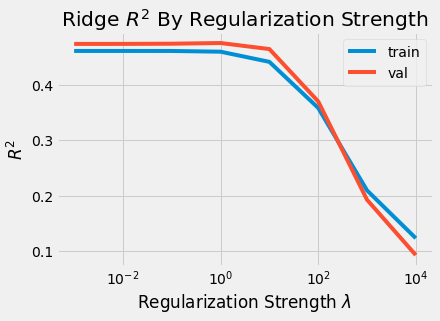

In [35]:
#testing various lambda values in Ridge Regression - code adapted from Regularization lecture notebook
from sklearn.linear_model import Ridge
alphas = [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10_000]
train_scores = []
val_scores = []
rmse_scores = []

for alpha in alphas:
    rr = Ridge(alpha=alpha, random_state=123)
    rr.fit(X_train_val, y_train_val)
    train_score = rr.score(X_train_val, y_train_val)
    val_score = rr.score(X_val, y_val)
    mse = mean_squared_error(y_val, rr.predict(X_val))
    rmse = (mse**0.5)
    train_scores.append(train_score)
    val_scores.append(val_score)
    rmse_scores.append(rmse)
    
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
plt.xscale('log')
plt.title('Ridge $R^2$ By Regularization Strength')
ax.set_xlabel('Regularization Strength $\lambda$')
ax.set_ylabel('$R^2$')
ax.plot(alphas, train_scores, label='train')
ax.plot(alphas, val_scores, label='val')
#ax.plot(alphas, rmse_scores, label= 'val RMSE')
plt.legend();

#adding the RMSE throws off the scaling and makes it hard to interpret visually, but confirms that .01 is optimal

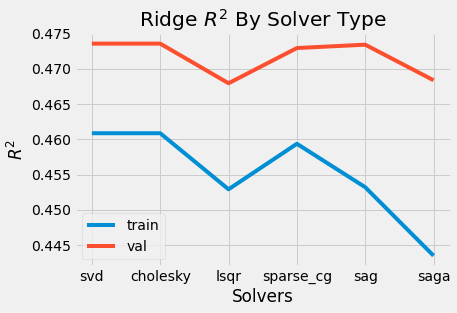

In [36]:
solvers = ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
train_scores = []
val_scores = []
rmse_scores = []

for solver in solvers:
    rr = Ridge(alpha=.01, solver=solver, random_state=123)
    rr.fit(X_train_val, y_train_val)
    train_score = rr.score(X_train_val, y_train_val)
    val_score = rr.score(X_val, y_val)
    mse = mean_squared_error(y_val, rr.predict(X_val))
    rmse = (mse**0.5)
    train_scores.append(train_score)
    val_scores.append(val_score)
    rmse_scores.append(rmse)
    
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
plt.title('Ridge $R^2$ By Solver Type')
ax.set_xlabel('Solvers')
ax.set_ylabel('$R^2$')
ax.plot(solvers, train_scores, label='train')
ax.plot(solvers, val_scores, label='val')
# ax.plot(solvers, rmse_scores, label= 'val RMSE')
plt.legend();

#solver type really doesn't affect the RMSE when added to visual -removed due to no value added

In [37]:
#refit RidgeCV with optimal lamba strength of .01 and svd solver identified above
rcv2 = Ridge(alpha=.01, solver='svd', random_state=123)
rcv2.fit(X_train_val, y_train_val)
rcv2.score(X_train_val, y_train_val)

0.46087766306873557

In [38]:
print_scores(rcv2, X_val, y_val)

MSE: 98.75382873513806 RMSE: 9.937496099880395 MAE: 7.103397333398637 R2: 0.47358508511240416 Exp Variance: 0.4738391676429181


In [39]:
scaled_rr = rcv2.fit(X_train_scaled, y_train_val)
scaled_rr.score(X_val_scaled, y_val)

0.47429874255896354

In [40]:
#scaled data scores are again very similar.
print_scores(rcv2, X_val_scaled, y_val)

MSE: 98.61994877987856 RMSE: 9.930757714287392 MAE: 7.096129214696907 R2: 0.47429874255896354 Exp Variance: 0.47459368607476526


## Model Iterations

#### With average net sales per order being in \\$25.00 and a median order of \\$23.00, an RMSE of \$9.93 still leaves something to be desired here. Standard linear regression with Ridge Regularization is pegged with lambda strength of .01 and solver type `svd`. Moving on to other Regressor model types to see if any further improvements in the metrics can be made.

In reading through the Scikit-learn documentation, I found several interesting and useful modeling methods and examples that may be worth exploration in my analysis. 

* Voting regressors are ensemble meta-estimators that fit several base regressor models on the whole dataset, and then average the individual predictions to form a final prediction. Reading this page in Scikit-learn goes over how to run these types of models as well as how to plot both the individual predictions as well as the Voting Regression predictions as well. Using this methodology, I should be able to identify the best performing individual models in the VotingRegressor for use in my second method below. [Link Here.](https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html#sphx-glr-auto-examples-ensemble-plot-voting-regressor-py)
    
    
* The second is Stacking. Stacking is a method of blending multiple estimators. In this strategy, models are individually fit on training data while the final estimator is trained using only the stacked predictions of these base models. Using the method found in Scikit-learn, I will implement stacking to see what improvements (if any) can be made to the metrics seen. [Link Here.](https://scikit-learn.org/stable/auto_examples/ensemble/plot_stack_predictors.html#sphx-glr-auto-examples-ensemble-plot-stack-predictors-py)


* Lastly, I will run a Support Vector Regression to see how it performs on scaled and unscaled data, as well as a Kernel Ridge Regression, which blends the Ridge Regularization and Kernel trick into the SVR. Since the L2 Regularization improved performance on my earlier models, I think it would be worth seeing how this does in the KRR. 

### Models chosen for further iteration:

* DecisionTree Regressor - After analysis, prone to overfitting. Not worth further analysis or tuning.
* RandomForest Regressor - Performs moderately well. Will GridSearch for tuning parameters.
* ExtraTrees Regressor - Prone to overfitting. Eliminated from further analysis.
* BayesianRidge Regressor - Performance is substandard compared to RF and GradientBoost, and is comparable in perfomance to the tuned Ridge Regression.
* GradientBoosting Regressor - Performs well, worth hyperparameter tuning search. Could be prone to overfitting.
* VotingRegressor - Average is as expected, less than optimal due to weak learners in the bunch. Performs better with removal of weak learners and addition of tuned RF and GB models as expected.

* Stacking of models above based on best performers

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,VotingRegressor, GradientBoostingRegressor
from sklearn import pipeline
import time
from sklearn.model_selection import cross_validate, cross_val_predict

### VotingRegressor

In [42]:
dt = DecisionTreeRegressor(random_state=123)
rf = RandomForestRegressor(random_state=123)
et = ExtraTreesRegressor(random_state=123)
gb = GradientBoostingRegressor(random_state=123)
bayes = BayesianRidge()

#including rcv2 in votingregressor- best performing linear regression with Ridge Reg from above
voter = VotingRegressor([("gb", gb), ("rf", rf), ("dt", dt), ("et", et), ("lr", rcv2), ('bayes', bayes)])

In [43]:
#writing function to fit and score multiple models at once, and store the scores in a dictionary
models = [dt, rf, et, gb, rcv2, bayes, voter]
def model_score(model_list, X_tr, y_tr, x_val, y_val):
    """
    model_list: list of defined model variable names (as strings) to score
    X_tr: training data - features
    y_tr: training target
    x_val: testing or validation data - features
    y_val: testing or validation target
    """
    scores = {}
    for model in model_list:
        model.fit(X_tr, y_tr)
        train_score = model.score(X_tr, y_tr)
        val_score = model.score(x_val, y_val)
        mse = mean_squared_error(y_val, model.predict(x_val))
        rmse = (mse**0.5)
        scores[model] = ('Training R2:', train_score), ('RMSE:', rmse), ('Val R2:', val_score)
    return scores

In [44]:
model_score(models, X_train_val, y_train_val, X_val, y_val)

{DecisionTreeRegressor(random_state=123): (('Training R2:',
   0.8148699811169945),
  ('RMSE:', 9.81335704333233),
  ('Val R2:', 0.4866548731227247)),
 RandomForestRegressor(random_state=123): (('Training R2:',
   0.7892086733138686),
  ('RMSE:', 9.016295770640738),
  ('Val R2:', 0.5666582399337012)),
 ExtraTreesRegressor(random_state=123): (('Training R2:', 0.8148699811169945),
  ('RMSE:', 9.559635710533147),
  ('Val R2:', 0.5128564810251408)),
 GradientBoostingRegressor(random_state=123): (('Training R2:',
   0.6346793568564433),
  ('RMSE:', 8.796678276611201),
  ('Val R2:', 0.5875116752871099)),
 Ridge(alpha=0.01, random_state=123, solver='svd'): (('Training R2:',
   0.46087766306873557),
  ('RMSE:', 9.937496099880395),
  ('Val R2:', 0.47358508511240416)),
 BayesianRidge(): (('Training R2:', 0.4602653693112472),
  ('RMSE:', 9.92496865258007),
  ('Val R2:', 0.4749114712281971)),
 VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=123)),
                        

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
def find_tree_params(model_list, X_tr, y_tr, folds):
    """
    model_list: list of defined models you want to try out, but make sure params are searchable with this grid
    X_tr and y_tr: training data
    folds = int of cross val folds to perform
    """
    for model in model_list:
        search_results= {}
        grid = {'n_estimators': [50, 100, 150],
                'max_depth': [3, 5, 7], 
                'min_samples_leaf': [1, 3, 5],
                'random_state': [123] 
    
}
        model = GridSearchCV(model, grid, cv=folds)
        model.fit(X_tr, y_tr)
        search_results[model] = model.best_params_
        search_results[model]['Score'] = model.best_score_
        print(search_results)

In [47]:
#GridSearch to find optimal parameters for RF and GradientBoost
rf_gs = RandomForestRegressor()
gb_gs = GradientBoostingRegressor()
models = [rf_gs, gb_gs]
find_tree_params(models,X_train_val, y_train_val, 5)

{GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [50, 100, 150],
                         'random_state': [123]}): {'max_depth': 7, 'min_samples_leaf': 5, 'n_estimators': 150, 'random_state': 123, 'Score': 0.5399862621546403}}
{GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [50, 100, 150],
                         'random_state': [123]}): {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 150, 'random_state': 123, 'Score': 0.5892083229160904}}


In [48]:
#fit and score tuned RF
tuned_rf = RandomForestRegressor(max_depth=7, min_samples_leaf=5, n_estimators=150, random_state=123)
tuned_rf.fit(X_train_val, y_train_val)
print("Training score:", tuned_rf.score(X_train_val, y_train_val))
print_scores(tuned_rf, X_val, y_val)

Training score: 0.5867108848801756
MSE: 80.68545979631959 RMSE: 8.98250854696613 MAE: 5.683607316993959 R2: 0.5698999219031471 Exp Variance: 0.5700168905843129


In [49]:
#fit and score tuned GB
tuned_gb = GradientBoostingRegressor(max_depth=5, min_samples_leaf=1, n_estimators=100, random_state=123)
tuned_gb.fit(X_train_val, y_train_val)
print("Training score:", tuned_gb.score(X_train_val, y_train_val))
print_scores(tuned_gb, X_val, y_val)

Training score: 0.7018057327191932
MSE: 70.45142344175352 RMSE: 8.393534621466305 MAE: 5.210090325161478 R2: 0.6244532434861974 Exp Variance: 0.6244550334078602


In [50]:
#rerun VotingRegressor with Tuned RF and GB, and remove weak learners
voter2 = VotingRegressor([("gb", tuned_gb), ("rf", tuned_rf), ('lr', scaled_rr)])

In [51]:
models2 = [voter2, tuned_gb, tuned_rf, scaled_rr]
model_score(models2, X_train_val, y_train_val, X_val, y_val)

{VotingRegressor(estimators=[('gb',
                              GradientBoostingRegressor(max_depth=5,
                                                        random_state=123)),
                             ('rf',
                              RandomForestRegressor(max_depth=7,
                                                    min_samples_leaf=5,
                                                    n_estimators=150,
                                                    random_state=123)),
                             ('lr',
                              Ridge(alpha=0.01, random_state=123,
                                    solver='svd'))]): (('Training R2:',
   0.6391664135385138),
  ('RMSE:', 8.475937163797559),
  ('Val R2:', 0.6170432753847555)),
 GradientBoostingRegressor(max_depth=5, random_state=123): (('Training R2:',
   0.7018057327191932),
  ('RMSE:', 8.393534621466305),
  ('Val R2:', 0.6244532434861974)),
 RandomForestRegressor(max_depth=7, min_samples_leaf=5, n_estimators=

In [52]:
#scaled versus unscaled data again shows little to no difference. Proceeding with unscaled data.
model_score(models2, X_train_scaled, y_train_val, X_val_scaled, y_val)

{VotingRegressor(estimators=[('gb',
                              GradientBoostingRegressor(max_depth=5,
                                                        random_state=123)),
                             ('rf',
                              RandomForestRegressor(max_depth=7,
                                                    min_samples_leaf=5,
                                                    n_estimators=150,
                                                    random_state=123)),
                             ('lr',
                              Ridge(alpha=0.01, random_state=123,
                                    solver='svd'))]): (('Training R2:',
   0.6391555433967155),
  ('RMSE:', 8.47573445739246),
  ('Val R2:', 0.6170615923805521)),
 GradientBoostingRegressor(max_depth=5, random_state=123): (('Training R2:',
   0.7018057327191932),
  ('RMSE:', 8.391774414600155),
  ('Val R2:', 0.624610738676457)),
 RandomForestRegressor(max_depth=7, min_samples_leaf=5, n_estimators=15

### Stacking

In [53]:
from sklearn.ensemble import StackingRegressor
#using the randomforest, GradientBoost, and tuned RidgeRegression models for the stacked method

estimators = [
    ("Random Forest", tuned_rf),
    ("Gradient Boosting", tuned_gb),
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=rcv2)
stacking_regressor

StackingRegressor(estimators=[('Random Forest',
                               RandomForestRegressor(max_depth=7,
                                                     min_samples_leaf=5,
                                                     n_estimators=150,
                                                     random_state=123)),
                              ('Gradient Boosting',
                               GradientBoostingRegressor(max_depth=5,
                                                         random_state=123))],
                  final_estimator=Ridge(alpha=0.01, random_state=123,
                                        solver='svd'))

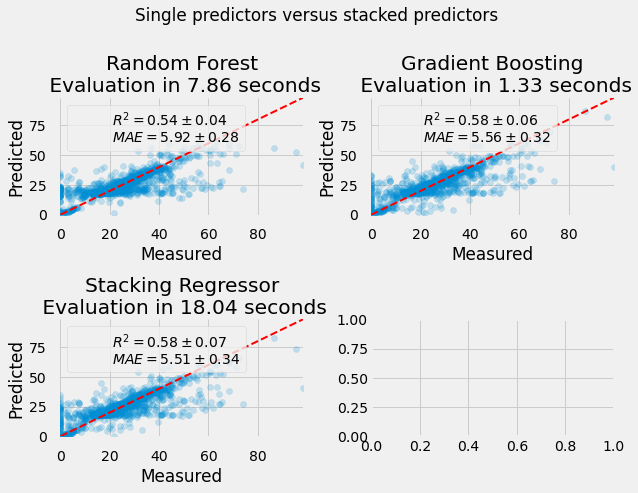

In [54]:
import time
from sklearn.model_selection import cross_validate, cross_val_predict

#code from SKLearn documentation linked in section above
def plot_regression_results(ax, y_true, y_pred, title, scores, elapsed_time):
    """Scatter plot of the predicted vs true targets."""
    ax.plot(
        [y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "--r", linewidth=2
    )
    ax.scatter(y_true, y_pred, alpha=0.2)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([y_true.min(), y_true.max()])
    ax.set_ylim([y_true.min(), y_true.max()])
    ax.set_xlabel("Measured")
    ax.set_ylabel("Predicted")
    extra = plt.Rectangle(
        (0, 0), 0, 0, fc="w", fill=False, edgecolor="none", linewidth=0
    )
    ax.legend([extra], [scores], loc="upper left")
    title = title + "\n Evaluation in {:.2f} seconds".format(elapsed_time)
    ax.set_title(title)


fig, axs = plt.subplots(2, 2, figsize=(9, 7))
axs = np.ravel(axs)

for ax, (name, est) in zip(
    axs, estimators + [("Stacking Regressor", stacking_regressor)]
):
    start_time = time.time()
    score = cross_validate(
        est, X_train_val, y_train_val, scoring=["r2", "neg_mean_absolute_error"], n_jobs=5, verbose=0
    )
    elapsed_time = time.time() - start_time

    y_pred = cross_val_predict(est, X_val, y_val, n_jobs=5, verbose=0)

    plot_regression_results(
        ax,
        y_val,
        y_pred,
        name,
        (r"$R^2={:.2f} \pm {:.2f}$" + "\n" + r"$MAE={:.2f} \pm {:.2f}$").format(
            np.mean(score["test_r2"]),
            np.std(score["test_r2"]),
            -np.mean(score["test_neg_mean_absolute_error"]),
            np.std(score["test_neg_mean_absolute_error"]),
        ),
        elapsed_time,
    )

plt.suptitle("Single predictors versus stacked predictors")
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()


# Final Results for Preliminary Modeling

### I have the final results for each iteration broken down in the cells to follow. For ease and readability, the top performing model in this analysis was the Stacking Regressor with a R-Squared or .5975, and an RMSE of \\$8.73. This model was run using the tuned RandomForest and GradientBoost Regressors, and the tuned RidgeRegression as the final estimator, and all features for prediction. 

#### With an explained variance of ~60%, we can reject the null hypothesis. However, it is worth noting that we are violating some of the assumptions of linear regression with this model as seen in the final section of this notebook. While I do believe that the discount codes CAN explain variation in net sales, the predictions and confidence intervals of the models could be affected with the violations seen. Namely, multicollinearity is seen between the discount codes on the full dataset. Because of this, the coefficients (discount codes) can not be interpreted individually as they may not truly move independently of one another in this modeling scenario. Another violation is the normal distribution of the residuals. In futher analysis, transformations on the continuous predictor may improve this assumption, as will removing outliers from the set. Lastly, heteroscedasticity is potentially being violated here as well on the full dataset. With the aforementioned transformations, we should see improvement in that as well. 

#### A close second place was the VoterRegressor without the weak learners, coming in at a R-squared of .579 and a RMSE \\$8.94. And the third best performer was the tuned RidgeRegressor with lamba of .01 (regularization strength) and solver as 'svd' (singular variable decomposition) with a R-squared of .54 and RMSE of \\$9.33.

#### I did run a second set of iterations with only the top ten SelectKBest identified predictors, but performance did not improve. On the Ridge, Bayes, and other typical weak learners, performance suffered quite significantly. On the GradientBoost and VotingRegressor, the performance did drop to the low 50's for R-squared and mid- \\$9 range for RMSE. Please see the Further Analysis section on this for more.

## Final Results on Full Dataset

#### Ridge Regressor:
    * Tuned:
    Parameters: alpha=0.01, solver='svd'
        Training R2: 0.49602706946613895
        RMSE: 9.336822826793783
        Testing R2: 0.5400556741305492
    
#### Bayes Regressor:
    * UnTuned:
        Training R2: 0.49279074890535546
        RMSE: 9.379602506966156
        Testing R2: 0.5358312504415321

#### RandomForest Regressor:
    * UnTuned:
        Training R2: 0.8271702463160727
        RMSE:  10.144913383463575
        Testing R2: 0.45699513990383933
    * Tuned using GridSearch:
    Parameters: max_depth=7, min_samples_leaf=5, n_estimators=150
        Training R2: 0.6182557334272448
        RMSE: 10.253477976372855
        Testing R2: 0.4453111504066489
    
#### GradientBoosting Regressor:
    * UnTuned:
         Training R2: 0.6681029019619205
         RMSE: 9.270870148001155
         Testing R2: 0.5465305582672157
    * Tuned using GridSearch:
    Parameters: max_depth=5, min_samples_leaf=1, n_estimators=100
         Training R2: 0.7686999976200524
         RMSE: 9.53715853128581
         Testing R2: 0.520106316809154

#### Voting Regressor:
    * With weak learners:
         Training R2: 0.7790196388720226
         RMSE: 9.137496988346353
         Testing R2: 0.5594841658706682
    * Without weak learners:
         Training R2: 0.685371011865773
         RMSE: 8.937874855958254
         Testing R2: 0.5785213609673865
    
#### Stacking Regressor:
    * Utilizing RF and GB with Tuned Ridge Regressor as the final estimator.
        Training R2: 0.700177317549842
        RMSE: 8.733921186772129
        Testing R2: 0.5975373642293151


In [55]:
#defining the models for the model scoring function
model_list = [rf, gb, tuned_rf, tuned_gb, voter, voter2, rcv2, bayes]
model_score(model_list, X_train, y_train, X_test, y_test)

{RandomForestRegressor(random_state=123): (('Training R2:',
   0.8271702463160727),
  ('RMSE:', 10.144913383463575),
  ('Val R2:', 0.45699513990383933)),
 GradientBoostingRegressor(random_state=123): (('Training R2:',
   0.6681029019619205),
  ('RMSE:', 9.270870148001155),
  ('Val R2:', 0.5465305582672157)),
 RandomForestRegressor(max_depth=7, min_samples_leaf=5, n_estimators=150,
                       random_state=123): (('Training R2:',
   0.6182557334272448),
  ('RMSE:', 10.253477976372855),
  ('Val R2:', 0.4453111504066489)),
 GradientBoostingRegressor(max_depth=5, random_state=123): (('Training R2:',
   0.7686999976200524),
  ('RMSE:', 9.53715853128581),
  ('Val R2:', 0.520106316809154)),
 VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=123)),
                             ('rf', RandomForestRegressor(random_state=123)),
                             ('dt', DecisionTreeRegressor(random_state=123)),
                             ('et', ExtraTreesRegressor(ra

In [56]:
estimators = [
    ("Random Forest", tuned_rf),
    ("Gradient Boosting", tuned_gb),
]

stacking_reg = StackingRegressor(estimators=estimators, final_estimator=rcv2)

stacking_reg.fit(X_train_val, y_train_val)
stacking_reg.score(X_train_val, y_train_val)

0.700177317549842

In [57]:
print_scores(stacking_reg, X_test, y_test)

MSE: 76.28137929674706 RMSE: 8.733921186772129 MAE: 5.698577961868618 R2: 0.5975373642293151 Exp Variance: 0.5980043139459726


# Final Results on Top 10 Selected Features
#### Utilizing the identified top 10 features in X_train_fst & X_val_fst, I am curious to see how performance on the better performing models is on a smaller set of features.

#### Ridge Regressor:
    * Tuned:
    Parameters: alpha=0.01, solver='svd'
        Training R2: 00.35999086089519206
        RMSE: 10.67947321459801
        Validation R2: 0.39204154197738805
    
#### Bayes Regressor:
    * UnTuned:
        Training R2: 0.35996769315494814
        RMSE: 10.682124213895428
        Validation R2: 0.3917396736265705

#### RandomForest Regressor:
    * UnTuned:
        Training R2: 0.7528881645303815
        RMSE:  9.852568723086767
        Validation R2: 0.4825442838387758
    * Tuned using GridSearch:
    Parameters: max_depth=7, min_samples_leaf=5, n_estimators=150
        Training R2: 0.5230557009695376
        RMSE: 9.687554259630536
        Validation R2: 0.4997322127028878
    
#### GradientBoosting Regressor:
    * UnTuned:
         Training R2: 0.5927234067427127
         RMSE: 9.427919805481
         Validation R2: 0.5261880578660257
    * Tuned using GridSearch:
    Parameters: max_depth=5, min_samples_leaf=1, n_estimators=100
         Training R2: 0.6723344557209032
         RMSE: 9.470919094935331
         Validation R2: 0.5218562354406482

#### Voting Regressor:
    * With weak learners:
         Training R2: 0.5770558760908517
         RMSE: 9.42489040197353
         Validation R2: 0.526492501896308
    * Without weak learners:
         Training R2: 0.5770558760908517
         RMSE: 9.42489040197353
         Validation R2: 0.526492501896308
 

In [58]:
reduced_set_models = [rf, gb, tuned_rf, tuned_gb, voter, voter2, rcv2, bayes]
model_score(reduced_set_models, X_train_fst, y_train_val, X_val_fst, y_val)

{RandomForestRegressor(random_state=123): (('Training R2:',
   0.7528881645303815),
  ('RMSE:', 9.852568723086767),
  ('Val R2:', 0.4825442838387758)),
 GradientBoostingRegressor(random_state=123): (('Training R2:',
   0.5927234067427127),
  ('RMSE:', 9.427919805481),
  ('Val R2:', 0.5261880578660257)),
 RandomForestRegressor(max_depth=7, min_samples_leaf=5, n_estimators=150,
                       random_state=123): (('Training R2:',
   0.5230557009695376),
  ('RMSE:', 9.687554259630536),
  ('Val R2:', 0.4997322127028878)),
 GradientBoostingRegressor(max_depth=5, random_state=123): (('Training R2:',
   0.6723344557209032),
  ('RMSE:', 9.470919094935331),
  ('Val R2:', 0.5218562354406482)),
 VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=123)),
                             ('rf', RandomForestRegressor(random_state=123)),
                             ('dt', DecisionTreeRegressor(random_state=123)),
                             ('et', ExtraTreesRegressor(random

In [59]:
#without weak learners
reduced_set_models2 = [tuned_rf, tuned_gb, voter2, rcv2]
model_score(reduced_set_models2, X_train_fst, y_train_val, X_val_fst, y_val)

{RandomForestRegressor(max_depth=7, min_samples_leaf=5, n_estimators=150,
                       random_state=123): (('Training R2:',
   0.5230557009695376),
  ('RMSE:', 9.687554259630536),
  ('Val R2:', 0.4997322127028878)),
 GradientBoostingRegressor(max_depth=5, random_state=123): (('Training R2:',
   0.6723344557209032),
  ('RMSE:', 9.470919094935331),
  ('Val R2:', 0.5218562354406482)),
 VotingRegressor(estimators=[('gb',
                              GradientBoostingRegressor(max_depth=5,
                                                        random_state=123)),
                             ('rf',
                              RandomForestRegressor(max_depth=7,
                                                    min_samples_leaf=5,
                                                    n_estimators=150,
                                                    random_state=123)),
                             ('lr',
                              Ridge(alpha=0.01, random_state=123,
       

In [60]:
#maybe tree params need to change - GridSearch RF and GB to see if these can be improved on the reduced set
reduced_mod = [rf_gs, gb_gs]
find_tree_params(reduced_mod,X_train_fst, y_train_val, 5)
#params return the same for tuning reduced set

{GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [50, 100, 150],
                         'random_state': [123]}): {'max_depth': 7, 'min_samples_leaf': 5, 'n_estimators': 150, 'random_state': 123, 'Score': 0.47707636825601585}}
{GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [50, 100, 150],
                         'random_state': [123]}): {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 100, 'random_state': 123, 'Score': 0.5162949570064617}}


In [61]:
#reduce set of testing data
X_test_fst = ten_feature_select.transform(X_test)
ten_test_import = {name: score for name, score in zip(X_test.columns, ten_feature_select.scores_)}
ten_test_import = pd.DataFrame(ten_feature_import)
ten_test_import = ten_feature_import.sort_values(by=0, ascending=False).head(10)
ten_test_import

,0
Total Discount Amount,472.651683
Discount Code_GET25EMPLOYEE,435.332662
Discount Code_MAIL25,159.821606
Discount Code_SAVE20,73.773491
Discount Code_Movers Free Medium,42.709737
Discount Code_Reading Program Free Personal,42.465822
Discount Code_100% Off,36.252408
Discount Code_GET25FREE,33.982795
Discount Code_others,24.124641
Discount Code_COLRG1,23.514088


In [62]:
#final scoring on holdout transformed data of reduced set of features
final_score_models = [rf, gb, tuned_rf, tuned_gb, voter, voter2, rcv2, bayes]
model_score(final_score_models, X_train_fst, y_train_val, X_test_fst, y_test)

{RandomForestRegressor(random_state=123): (('Training R2:',
   0.7528881645303815),
  ('RMSE:', 10.631778824486007),
  ('Val R2:', 0.40362573205001584)),
 GradientBoostingRegressor(random_state=123): (('Training R2:',
   0.5927234067427127),
  ('RMSE:', 10.566254419377318),
  ('Val R2:', 0.41095407331854006)),
 RandomForestRegressor(max_depth=7, min_samples_leaf=5, n_estimators=150,
                       random_state=123): (('Training R2:',
   0.5230557009695376),
  ('RMSE:', 10.78185293404182),
  ('Val R2:', 0.3866705235344582)),
 GradientBoostingRegressor(max_depth=5, random_state=123): (('Training R2:',
   0.6723344557209032),
  ('RMSE:', 10.913059198591538),
  ('Val R2:', 0.37165226775324056)),
 VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=123)),
                             ('rf', RandomForestRegressor(random_state=123)),
                             ('dt', DecisionTreeRegressor(random_state=123)),
                             ('et', ExtraTreesRegress

### Support Vector Machines


In [63]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

In [64]:
#define baseline support vector regressor and Kernel Ridge
svr = SVR()
kr = KernelRidge()

In [65]:
#Fit SupportVectorRegressor to scaled data
svr.fit(X_train_scaled, y_train_val)
svr.score(X_train_scaled, y_train_val)

0.47408200503410813

In [66]:
#predict and score on validation data
svr.predict(X_val_scaled)
svr.score(X_val_scaled, y_val)

0.487101620826501

In [67]:
#Fit on unscaled data
svr.fit(X_train_val, y_train_val)
svr.score(X_train_val, y_train_val)

0.17098144659899384

In [68]:
#predict and score on validation - OUCH
svr.predict(X_val)
svr.score(X_val, y_val)

0.16111599510647667

In [69]:
#Kernel Ridge on Unscaled performs better than SVR, but worse than SVR on scaled.
kr.fit(X_train_val, y_train_val)
kr.score(X_train_val, y_train_val)

0.4595543142003401

In [70]:
#predict and score
kr.predict(X_val)
kr.score(X_val, y_val)

0.4751684888253541

In [71]:
#uh, what? KR performs REALLY bad on scaled data?
kr.fit(X_train_scaled, y_train_val)
kr.score(X_train_scaled, y_train_val)

-2.3996404922652244

In [72]:
#Running a grid search on both to find optimal parameters
svr_gs = GridSearchCV(
    SVR(),
    param_grid={"C": [1e0, 1e1, 1e2], "gamma": np.logspace(-2, 2, 5)}, cv=5,
)

kr_gs = GridSearchCV(
    KernelRidge(),
    param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3], "kernel":['rbf', 'linear'], 
                "gamma": np.logspace(-2, 2, 5)}, cv=5,
)

In [73]:
#fit SVR grid search
svr_gs.fit(X_train_scaled, y_train_val)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1.0, 10.0, 100.0],
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})

In [74]:
#print the best parameters, training and validation score
svr_gs_preds = svr_gs.predict(X_val)
print(svr_gs.best_params_)
print(f'Training score: {svr_gs.score(X_train_scaled, y_train_val)}')
print(f'Validation score: {svr_gs.score(X_val_scaled, y_val)}')

{'C': 100.0, 'gamma': 0.01}
Training score: 0.5765522700311857
Validation score: 0.49642000455427215


In [75]:
#fit kernel grid search
kr_gs.fit(X_train_val, y_train_val)

GridSearchCV(cv=5, estimator=KernelRidge(),
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001],
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['rbf', 'linear']})

In [76]:
#print the best parameters, training and validation score
kr_gs_preds = kr_gs.predict(X_val)
print(kr_gs.best_params_)
print(f'Training score: {kr_gs.score(X_train_val, y_train_val)}')
print(f'Validation score: {kr_gs.score(X_val, y_val)}')

{'alpha': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Training score: 0.6942944169048522
Validation score: 0.5876768049719572


### Final Evaluation of the Support Vector Regressors

Using the parameters identified by the GridSearch, I will fit the SVR and KRR and do a final evaluaton.

##### SVR Tuned:
    * Parameters: {'C': 100.0, 'gamma': 0.01}
    * GS Training score: 0.5765522700311857
    * GS Validation score: 0.49642000455427215
    * Validation RMSE: 9.719571372043502
    * Testing score: 0.31406446556022083
    * Test RMSE: 11.402186386582247

##### KRR Tuned:
    * Parameters: {'alpha': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
    * GS Training score: 0.6942944169048522
    * GS Validation score: 0.5876768049719572
    * Validation RMSE: 8.794917332081205
    * Testing score: 0.49701240894002774
    * Test RMSE: 9.76394041683183

In [77]:
svr_tuned = SVR(C=100, gamma=0.01)
svr_tuned.fit(X_train_scaled, y_train_val)

SVR(C=100, gamma=0.01)

In [78]:
svr_tuned.fit(X_train_scaled, y_train_val)
svr_tuned_preds = svr_tuned.predict(X_val_scaled)
print(f'Training score: {svr_tuned.score(X_train_scaled, y_train_val)}')
print(f'Validation score: {svr_tuned.score(X_val_scaled, y_val)}')
print(f'RMSE: {(mean_squared_error(y_val, svr_tuned_preds)**0.5)}')

Training score: 0.5765522700311857
Validation score: 0.49642000455427215
RMSE: 9.719571372043502


In [79]:
X_test_scaled = ss.fit_transform(X_test)
print(f'Testing score: {svr_tuned.score(X_test_scaled, y_test)}')
print(f'RMSE: {(mean_squared_error(y_test, svr_tuned.predict(X_test_scaled))**0.5)}')

Testing score: 0.31406446556022083
RMSE: 11.402186386582247


In [80]:
kr_tuned = KernelRidge(alpha=0.1, gamma=0.1, kernel= 'rbf')

In [81]:
kr_tuned.fit(X_train_val, y_train_val)
kr_tuned_preds = kr_tuned.predict(X_val)
print(f'Training score: {kr_tuned.score(X_train_val, y_train_val)}')
print(f'Validation score: {kr_tuned.score(X_val, y_val)}')
print(f'RMSE: {(mean_squared_error(y_val, kr_tuned_preds)**0.5)}')

Training score: 0.6942944169048522
Validation score: 0.5876768049719572
RMSE: 8.794917332081205


In [82]:
print(f'Testing score: {kr_tuned.score(X_test, y_test)}')
print(f'RMSE: {(mean_squared_error(y_test, kr_tuned.predict(X_test)))**0.5}')

Testing score: 0.49701240894002774
RMSE: 9.76394041683183


### Assumption Violations

There may be a risk of violating the assumptions for linear regression with the models above. Utilizing code adapted from Jeff Macaluso and the blog he wrote [here](https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/), I will test my data for assumption violations. The assumptions for linear regression are Linearity, Normality (normal distribution of the residuals), no multicollinearity, no autocorrelation of the residuals, and homoscedasticity or equal variance in the residuals.

### Linearity
Assumes that the relationship between the independent and target variable is linear. If there is no linear relationship, the model could be underfitting and will affect our predictions. Nonlinear transformations, adding variables and adding polynomial terms can help to correct the linear relationship problem if this assumption is violated.

#### Linearity Assumption - OK

In [83]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [84]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

In [85]:
#calculate residuals on holdout set
calculate_residuals(stacking_reg, X_test, y_test)

,Actual,Predicted,Residuals
Order Num,,,
391484,5.00,2.952605,2.047395
1183041,31.78,38.863432,-7.083432
1176868,43.18,44.084345,-0.904345
936599,18.56,20.554952,-1.994952
542303,23.99,14.202477,9.787523
...,...,...,...
761766,13.87,19.173907,-5.303907
423427,6.75,19.550796,-12.800796
415506,25.72,18.346377,7.373623


Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


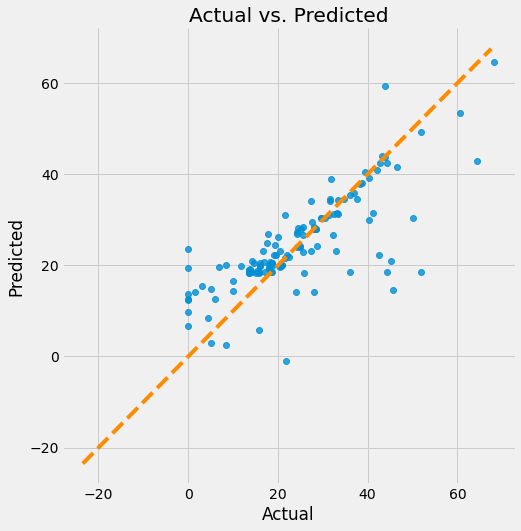

In [86]:
#check on final holdout and top perfoming model
linear_assumption(stacking_reg, X_test, y_test)

## Error Normality
This assumption checks for normal distribution of the residuals. This causes problems with our confidence intervals (or how confident we are that the population mean would fall within our confidence interval range given our data) and is caused by significantly non-normally distributed data. While I did observe that the Discount Amount has skew and kurtosis in my EDA notebook, the rough distribution visually appeared largely normal. Should this assumption be violated, we can correct with non-linear transformations and excluding variables or removing outliers (such as the Facebook Promo day).

#### Error Normality - Violated - May need to remove outliers

In [87]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 7.478497676759136e-14
Residuals are not normally distributed


/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


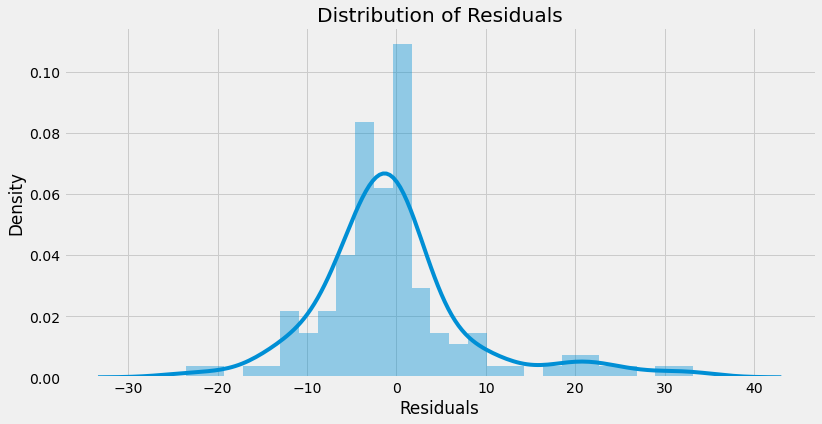


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [88]:
#check on final holdout and top performing model
normal_errors_assumption(stacking_reg, X_test, y_test, p_value_thresh=0.05)

## Multicollinearity Assumptions
This assumption checks for collinearity among the predictors. Of the assumptions, this is the assumptions I fear violating the most. With so many discount codes being encoded, I worry that there may be some correlation between them. While the model will not be unusable if there is some correlation between the variables, it does affect interpretability of the coefficients. Should this test Jeff wrote show high multicollinearity, we can resolve by removing the features with a high variance inflation factor or perform additional dimensionality reduction testing steps. 

#### Multicollinearity - Violated if using the full dataset - Collinearity exists between the discount codes. Not violated if using reduced feature set.

In [89]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = []
    for i in range(features.shape[1]):
        VIF.append(variance_inflation_factor(features.values, i))
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

In [90]:
feature_list = list(X.columns)

Assumption 3: Little to no multicollinearity among predictors


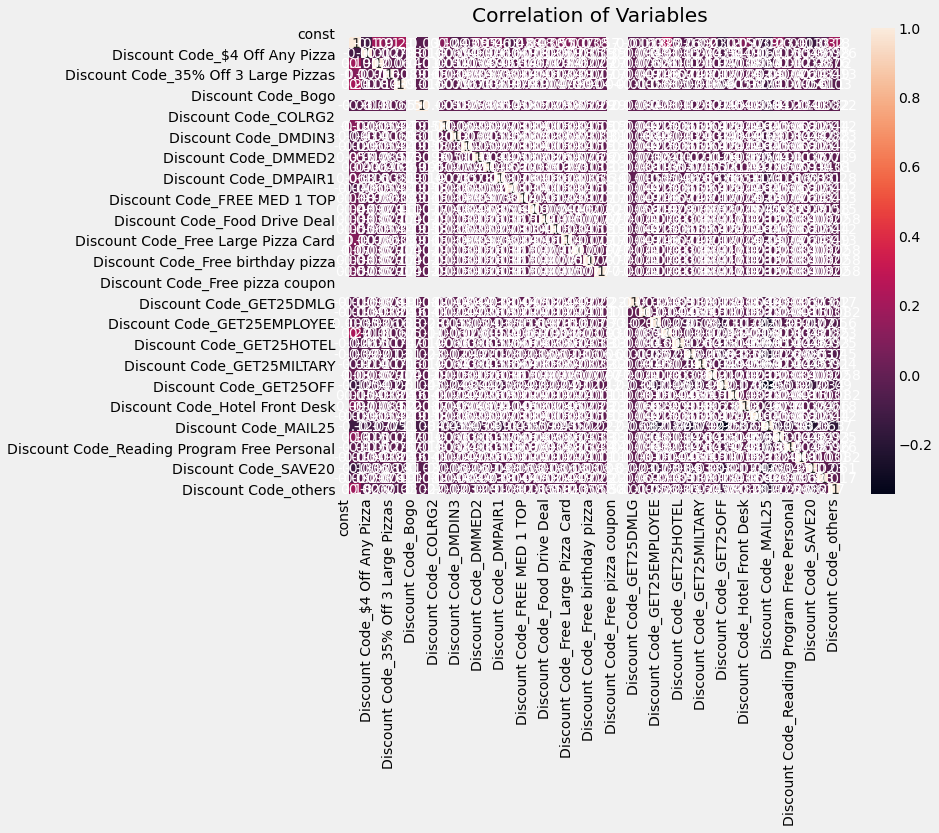

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------


/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


const: 0.0
Total Discount Amount: 1.4307644431548223
Discount Code_$4 Off Any Pizza: inf
Discount Code_100% Off: inf
Discount Code_35% Off 3 Large Pizzas: inf
Discount Code_7-7-7 Deal: inf
Discount Code_Bogo: nan
Discount Code_COLRG1: inf
Discount Code_COLRG2: nan
Discount Code_Coupon: inf
Discount Code_DMDIN3: inf
Discount Code_DMFAV1: inf
Discount Code_DMMED2: inf
Discount Code_DMMED3: inf
Discount Code_DMPAIR1: inf
Discount Code_Employee Discount: inf
Discount Code_FREE MED 1 TOP: inf
Discount Code_FREEMDM: inf
Discount Code_Food Drive Deal: inf
Discount Code_Free Birthday Pizza: inf
Discount Code_Free Large Pizza Card: inf
Discount Code_Free Large pizza coupon: inf
Discount Code_Free birthday pizza: inf
Discount Code_Free large pizza coupon: inf
Discount Code_Free pizza coupon: nan
Discount Code_Free pizza credit: nan
Discount Code_GET25DMLG: inf
Discount Code_GET25EMAIL: inf
Discount Code_GET25EMPLOYEE: inf
Discount Code_GET25FREE: inf
Discount Code_GET25HOTEL: inf
Discount Code_G

In [91]:
multicollinearity_assumption(stacking_reg, X_val, y_val, feature_names=feature_list)

In [92]:
#convert top ten to DF so function runs
top_ten_df = pd.DataFrame(X_val_fst, columns=ten_feature_import.index)
top_ten_df

,Total Discount Amount,Discount Code_GET25EMPLOYEE,Discount Code_MAIL25,Discount Code_SAVE20,Discount Code_Movers Free Medium,Discount Code_Reading Program Free Personal,Discount Code_100% Off,Discount Code_GET25FREE,Discount Code_others,Discount Code_COLRG1
0,6.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,9.68,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,18.75,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,14.97,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,15.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1296,5.50,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1297,9.31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1298,4.49,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1299,6.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Assumption 3: Little to no multicollinearity among predictors


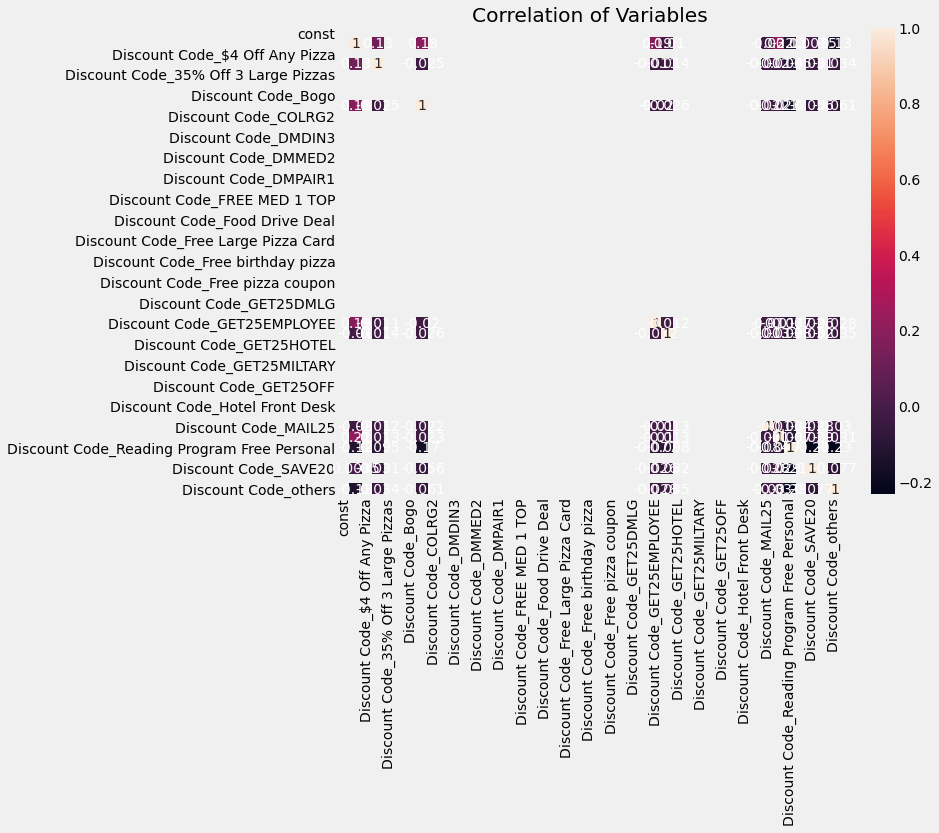

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
const: 2.0001687734567444
Total Discount Amount: 1.066316599491465
Discount Code_$4 Off Any Pizza: 1.0103446319196687
Discount Code_100% Off: 1.0953641144388133
Discount Code_35% Off 3 Large Pizzas: 1.085492965490112
Discount Code_7-7-7 Deal: 1.465851283527742
Discount Code_Bogo: 1.0549592551818927
Discount Code_COLRG1: 1.018809435373135
Discount Code_COLRG2: 1.0580505946333587
Discount Code_Coupon: 1.1449798934005566

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied


In [93]:
#run multicollinearity check on top ten features
multicollinearity_assumption(stacking_reg, top_ten_df, y_val, feature_names=feature_list)

## Autocorrelation
Since this is not a time series analysis, we're looking to see if the model is biased and could be over or under predicting and thus affecting our prediction validity and model estimates. 

#### Autocorrelation - OK

In [94]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [95]:
#check on final holdout and top performing model
autocorrelation_assumption(stacking_reg, X_test, y_test)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.3512078655454642
Little to no autocorrelation 

Assumption satisfied


## Homoscedasticity 
Residuals should have relatively consistent variance. To correct violation, can use weighted OLS, or transform the skewed variables.

#### Homoscedasticity - Violated

In [96]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


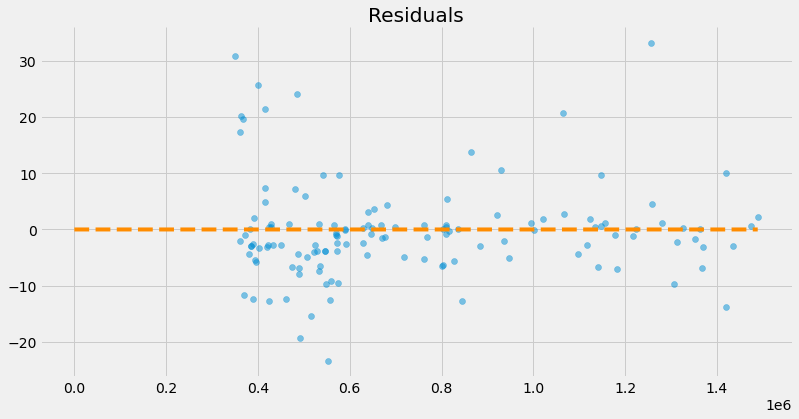

In [97]:
#check on final holdout and top performing model
homoscedasticity_assumption(stacking_reg, X_test, y_test)

# Further Analysis 
## To be addressed in Final Modeling Notebook